# Modeling 

In [62]:
from sklearn import model_selection, preprocessing, naive_bayes, metrics
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.metrics import confusion_matrix
from sklearn import decomposition, ensemble
import pandas as pd
import numpy as np

## Setting dataframes
- df_baseline is just numerical data
- just metadata dataframe (in the works)
- df_text is with vectorized description
    - this was already split into train and test sets in preprocessing
    - joined to df after splitting into train/test

In [2]:
# load in dataframe
df = pd.read_csv('csv_files/9_1_all_books_df.csv')

In [3]:
# this just includes pages and ratings along with the target of best seller or not
df_baseline = df[['rating', 'pages', 'best_seller']]

In [4]:
# this data is already split into the training set with a reset index
# so it will be concated with the df after spliting into train and test sets
df_text_X = pd.read_csv('csv_files/X_train_nlp.csv')
df_text_y= pd.read_csv('csv_files/y_train_nlp.csv', header=None)
df_text_X_test = pd.read_csv('csv_files/X_test_nlp.csv')
df_text_y_test = pd.read_csv('csv_files/y_test_nlp.csv', header=None)

In [5]:
df_text_X.tail()
# df_text_X.shape

,aaron,ab,abandon,abandonment,abby,abc,abduct,abducted,ability,able,...,zelda,zest,zeus,zillion,zimmer,zoe,zone,zoom,zorie,zoroastrian
1093,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1094,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1095,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1096,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1097,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
df_text_y.tail()
# df_text_y.shape

,0
1093,1
1094,1
1095,1
1096,0
1097,1


In [7]:
df_text_X_test.head()
df_text_X_test.shape

(275, 5842)

In [8]:
df_text_y_test.head()
# df_text_y_test.shape
type(df_text_y_test)

# this is a series
type(df_text_y_test[0])

pandas.core.series.Series

In [9]:
df_text_y.columns

Int64Index([0], dtype='int64')

In [10]:
# look at dataframe
print(df_baseline.columns)
print(df_baseline.shape)
df_baseline.head()

Index(['rating', 'pages', 'best_seller'], dtype='object')
(1373, 3)


,rating,pages,best_seller
0,3.56,415,0
1,4.07,346,0
2,3.47,355,0
3,3.42,368,0
4,4.35,480,0


In [11]:
# split the dataset into training and validation datasets for just numerical data
X_train_rating, X_test_rating, y_train_rating, y_test_rating = model_selection.train_test_split(df_baseline[['rating', 'pages']], 
                                                                    df_baseline['best_seller'], 
                                                                    test_size = .2,
                                                                   random_state=42)

In [12]:
# this actually doesn't need to happen... the text data is already split...
# split the dataset with nlp and other features
X_train, X_test, y_train, y_test = model_selection.train_test_split(df[['rating', 'pages']], 
                                                                    df['best_seller'], 
                                                                    test_size = .2,
                                                                   random_state=42)

In [13]:
df_text = df_text_X 

In [14]:
df_text['_target'] = df_text_y[0]

In [15]:
df_text['_target'].dtype

dtype('int64')

In [16]:
df_text.head()

,aaron,ab,abandon,abandonment,abby,abc,abduct,abducted,ability,able,...,zest,zeus,zillion,zimmer,zoe,zone,zoom,zorie,zoroastrian,_target
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
# deep vs shallow copies
df_text_X = df_text_X.loc[:, df_text_X.columns != '_target']

In [18]:
y_train_rating.tail()

1095    1
1130    1
1294    1
860     0
1126    1
Name: best_seller, dtype: int64

## Numerical Baseline model
- On numerical data only

In [19]:
base = DummyClassifier(random_state=42)

In [20]:
base.fit(X_train_rating, y_train_rating)

/Users/rhillery/anaconda3/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


DummyClassifier(constant=None, random_state=42, strategy='warn')

In [21]:
print('mean training accuracy' ,base.score(X_train_rating, y_train_rating))
print('mean test accuracy', base.score(X_test_rating, y_test_rating))
# mean training accuracy 0.663023679417122
# mean test accuracy 0.6654545454545454

mean training accuracy 0.663023679417122
mean test accuracy 0.6654545454545454


In [22]:
base_2 = DummyClassifier(strategy= 'most_frequent', random_state=42)

In [23]:
base_2.fit(X_train_rating, y_train_rating)

DummyClassifier(constant=None, random_state=42, strategy='most_frequent')

In [24]:
print('mean training accuracy' ,base_2.score(X_train_rating, y_train_rating))
print('mean test accuracy', base_2.score(X_test_rating, y_test_rating))
# mean training accuracy 0.7932604735883424
# mean test accuracy 0.7745454545454545

mean training accuracy 0.7932604735883424
mean test accuracy 0.7745454545454545


# Tree based Modeling

## Numerical Random Forest

In [25]:
random_forest = RandomForestClassifier()

In [26]:
# use X_train_rating, y_train_rating for numerical models
random_forest.fit(X_train_rating, y_train_rating)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [27]:
random_meta_predictions = random_forest.predict(X_test_rating)

In [28]:
confusion_matrix(y_test_rating, random_meta_predictions)

array([[196,  17],
       [ 45,  17]])

In [29]:
random_forest.score(X_test_rating, y_test_rating)

0.7745454545454545

In [30]:
random_forest.decision_path(X_train_rating)

(<1098x45692 sparse matrix of type '<class 'numpy.int64'>'
 	with 1392607 stored elements in Compressed Sparse Row format>,
 array([    0,   503,   906,  1401,  1826,  2273,  2730,  3179,  3660,
         4125,  4582,  5015,  5442,  5891,  6374,  6843,  7288,  7809,
         8238,  8675,  9146,  9563,  9996, 10489, 10948, 11393, 11842,
        12259, 12688, 13125, 13602, 14055, 14488, 14923, 15440, 15897,
        16364, 16825, 17322, 17759, 18274, 18751, 19202, 19621, 20052,
        20503, 20936, 21379, 21864, 22307, 22764, 23241, 23660, 24143,
        24610, 25027, 25492, 25967, 26448, 26897, 27378, 27813, 28304,
        28767, 29220, 29681, 30128, 30617, 31072, 31567, 31994, 32425,
        32890, 33373, 33798, 34249, 34718, 35145, 35608, 36079, 36514,
        36977, 37392, 37811, 38246, 38667, 39146, 39621, 40100, 40577,
        41020, 41503, 41974, 42449, 42920, 43393, 43890, 44319, 44792,
        45219, 45692]))

In [31]:
random_forest.decision_path(X_test_rating)

(<275x45692 sparse matrix of type '<class 'numpy.int64'>'
 	with 345264 stored elements in Compressed Sparse Row format>,
 array([    0,   503,   906,  1401,  1826,  2273,  2730,  3179,  3660,
         4125,  4582,  5015,  5442,  5891,  6374,  6843,  7288,  7809,
         8238,  8675,  9146,  9563,  9996, 10489, 10948, 11393, 11842,
        12259, 12688, 13125, 13602, 14055, 14488, 14923, 15440, 15897,
        16364, 16825, 17322, 17759, 18274, 18751, 19202, 19621, 20052,
        20503, 20936, 21379, 21864, 22307, 22764, 23241, 23660, 24143,
        24610, 25027, 25492, 25967, 26448, 26897, 27378, 27813, 28304,
        28767, 29220, 29681, 30128, 30617, 31072, 31567, 31994, 32425,
        32890, 33373, 33798, 34249, 34718, 35145, 35608, 36079, 36514,
        36977, 37392, 37811, 38246, 38667, 39146, 39621, 40100, 40577,
        41020, 41503, 41974, 42449, 42920, 43393, 43890, 44319, 44792,
        45219, 45692]))

In [32]:
random_forest.feature_importances_

array([0.47672798, 0.52327202])

## Text Modeling Random Forest
- only using text features

In [33]:
random_forest_text = RandomForestClassifier()

In [34]:
# use df_text_X, df_text_y[0] for text models
random_forest_text.fit(df_text_X, df_text_y[0])

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [35]:
# look at what features are important...
random_forest_text.feature_importances_
len(random_forest_text.feature_importances_)

5842

In [36]:
max(random_forest_text.feature_importances_)

0.01006709972877406

In [37]:
# random_forest_text.feature_importances_.where(max(random_forest_text.feature_importances_))
np.where(random_forest_text.feature_importances_ == max(random_forest_text.feature_importances_))
# this is 'prize'... maybe a little to telling

(array([4021]),)

In [38]:
random_forest_text.feature_importances_[4091]

0.009368064800809353

In [39]:
df_text_X.head()

,aaron,ab,abandon,abandonment,abby,abc,abduct,abducted,ability,able,...,zelda,zest,zeus,zillion,zimmer,zoe,zone,zoom,zorie,zoroastrian
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
# name of column
print(df_text_X.columns[4091])
# amount of times word appears
df_text_X.iloc[:,4091].sum()
# this is a word to remove...

prize


23

In [41]:
# look at accuracy for training set
random_forest_text.score(df_text_X, df_text_y[0])

0.98816029143898

In [42]:
random_text_predictions = random_forest_text.predict(df_text_X_test)

In [43]:
confusion_matrix(df_text_y_test[0], random_text_predictions)

array([[213,   0],
       [ 51,  11]])

In [44]:
# look at accuracy for test set
random_forest_text.score(df_text_X_test, df_text_y_test)

0.8145454545454546

Initially, the text model performs marginally better (> .1) on the test set that the meta data model, as seen in the subset accuracy for both models.

# Logistic Regression

## Numerical Logistic Regression

In [45]:
log  = LogisticRegression()

In [46]:
# use X_train_rating, y_train_rating for numerical models
log.fit(X_train_rating, y_train_rating)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [47]:
log_predictions_training = log.predict(X_train_rating)

In [48]:
confusion_matrix(y_train_rating, log_predictions_training)

array([[862,   9],
       [202,  25]])

In [49]:
log.score(X_train_rating, y_train_rating)

0.807832422586521

In [50]:
log_predictions = log.predict(X_test_rating)

In [51]:
confusion_matrix(y_test_rating,log_predictions)

array([[212,   1],
       [ 56,   6]])

In [52]:
target_names = ['Not Bestseller', 'Bestseller']
print(classification_report(y_test_rating,log_predictions, target_names=target_names))


                precision    recall  f1-score   support

Not Bestseller       0.79      1.00      0.88       213
    Bestseller       0.86      0.10      0.17        62

      accuracy                           0.79       275
     macro avg       0.82      0.55      0.53       275
  weighted avg       0.81      0.79      0.72       275



- The initial logistic model predicts the major class 98% of the time. 
- Will look optimizing for specificity by inspecting the true negative instances.




### Cross Validated  Numerical Logistic

## Text Modeling Logistic Regression

In [53]:
log_text = LogisticRegression()

In [54]:
# use df_text_X, df_text_y[0] for text models
log_text.fit(df_text_X, df_text_y[0])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [55]:
log_predictions_text_training = log_text.predict(df_text_X)

In [56]:
confusion_matrix(df_text_y[0], log_predictions_text_training)

array([[871,   0],
       [ 38, 189]])

In [68]:
df_text_y[0].shape

(1098,)

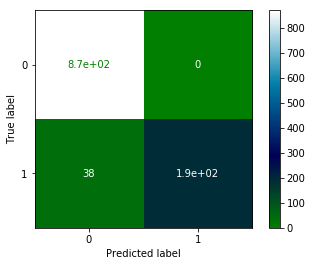

In [76]:
log_text_confusion = plot_confusion_matrix(log_text, df_text_X, df_text_y[0], cmap='ocean')

In [64]:
log_text.score(df_text_X, df_text_y[0])

0.9653916211293261

In [58]:
target_names = ['Not Bestseller', 'Bestseller']
print(classification_report(df_text_y[0], log_predictions_text_training, target_names=target_names))



                precision    recall  f1-score   support

Not Bestseller       0.96      1.00      0.98       871
    Bestseller       1.00      0.83      0.91       227

      accuracy                           0.97      1098
     macro avg       0.98      0.92      0.94      1098
  weighted avg       0.97      0.97      0.96      1098



Text features perform better than numerical features wrt to accuracy for logistic regression baseline models.

### Cross Validated Text Modeling Logistic

# things to do
- get the text test set... check
- find most important features....
- word counts...
- look at correctly predicted minority classes in baseline models
- add voting classifier? `from sklearn.ensemble import VotingClassifier`
